# Importing All Library Files.

In [5]:
python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (1104305986.py, line 1)

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from numpy import array
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Loading the DataSet


In [12]:
df = pd.read_csv("financial_sentiment_data1.csv")
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


# Exploratory Data Analysis.

In [13]:
df.shape

(5842, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [15]:
df.dtypes

Sentence     object
Sentiment    object
dtype: object

In [16]:
df.isnull().values.any()


False

In [17]:
df.isna().sum()
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

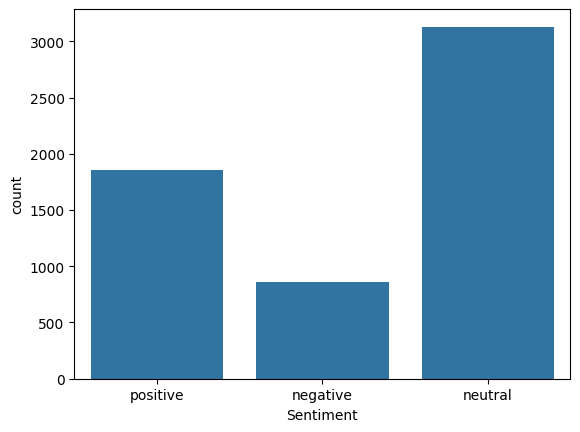

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


In [18]:
#Checking for Class Imbalance 
sns.countplot(x=df['Sentiment'])
plt.show()
print(df['Sentiment'].value_counts())

In [19]:
#  Now let's check how many unique characters (chars) are there.
unique_chars = pd.Series([char for sentence in df["Sentence"] for char in sentence]).unique()
print("Number of unique chars:",len(unique_chars))
print(unique_chars)

Number of unique chars: 119
['T' 'h' 'e' ' ' 'G' 'o' 'S' 'l' 'u' 't' 'i' 'n' 's' 'c' 'g' 'y' 'w' 'v'
 'r' 'a' 'B' 'f' "'" 'P' 'b' 'p' 'd' 'L' ',' 'C' 'm' '.' '$' 'E' 'I' '1'
 '5' '0' '2' 'K' 'F' 'q' 'U' 'R' '3' '7' '6' 'z' '-' 'x' 'A' 'j' '4' 'k'
 'Y' 'D' 'M' 'H' 'O' 'N' 'X' '8' ':' '%' 'Q' '#' '?' '/' '9' 'V' '+' 'ñ'
 'J' '`' 'W' '@' '&' '(' ')' 'Z' 'ú' '!' '>' 'ó' 'Â' '£' '"' ';' 'à' '®'
 '¦' '=' 'ä' 'â' '€' '“' 'Ã' '¶' 'Ñ' '_' '📈' 'é' '…' '”' '^' 'á' '«' '|'
 '[' ']' '~' '{' '}' '¼' '¬' 'í' '<' 'Á' '’']


# Text Cleaning

In [21]:
import nltk
nltk.download('stopwords')
mystopwords =stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
def cleanTxt(clean_text):
    # remove numbers and punctuation
    clean_text = re.sub(r'@[A-Za-za-z0-9]+','', clean_text)
    clean_text = re.sub(r'#','', clean_text)
    # remove extra spaces
    clean_text = re.sub(r'RT[\s]+','', clean_text)
    clean_text = re.sub(r'https?:\/\/\S+','', clean_text)
    clean_text ="".join([x for x in clean_text if x not in string.punctuation])
    clean_text = clean_text.lower() # convert to lowercase
    clean_text = re.sub(r'[^a-z0-9\s]', '', clean_text) # remove non-alphanumeric characters
    clean_text = re.sub(' +',' ', clean_text)

    # convert to lowercase
    clean_text = clean_text.lower()
    tokens = clean_text.split(" ")
    tokens =[ token for token in tokens if tokens if token not in mystopwords]
    clean_text=" ".join([ps.stem(token)for token in tokens])
    return clean_text

df['clean_Sentence'] = df['Sentence'].apply(cleanTxt)
df.head()

,Sentence,Sentiment,clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low 150 250 bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale doubl eu...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnishrussian chamber commerc major co...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain 224 percent st...


In [24]:
import neattext.functions as nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [25]:
df['clean_Sentence']=df['clean_Sentence'].apply(nfx.remove_special_characters)
df['clean_Sentence']=df['clean_Sentence'].apply(nfx.remove_numbers)
df['clean_Sentence']=df['clean_Sentence'].apply(nfx.remove_urls)
df['clean_Sentence']=df['clean_Sentence'].apply(nfx.remove_userhandles)

In [26]:
unique_chars = pd.Series([char for sentence in df["clean_Sentence"] for char in sentence]).unique()
print("Number of unique chars:",len(unique_chars))
print(unique_chars)

Number of unique chars: 27
['g' 'e' 'o' 's' 'l' 'u' 't' ' ' 'c' 'h' 'n' 'v' 'r' 'a' 'b' 'f' 'p' 'i'
 'd' 'm' 'w' 'k' 'q' 'y' 'z' 'x' 'j']


In [27]:
import collections

from collections import Counter

In [28]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
    Processed_text = list()
    Lemmatizer = WordNetLemmatizer()

    # Tokens of words
    Token = nltk.word_tokenize(Text)
    for word in Tokens:
        Processed_Text.append(Lemmatizer.lemmatize(word))
    return(" ".join(Processed_Text))

In [29]:
df.head()

,Sentence,Sentiment,clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubl eurm e...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnishrussian chamber commerc major co...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain percent stake...


In [30]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
    Processed_text = list()
    Lemmatizer = WordNetLemmatizer()

    # Tokens of words
    Token = nltk.word_tokenize(Text)
    for word in Tokens:
        Processed_Text.append(Lemmatizer.lemmatize(word))
    return(" ".join(Processed_Text))


# Key Words Extraction

In [31]:
def extract_keywords(text,num=50):
    tokens = [token for token in text.split()]
    most_comman_tokens= Counter(tokens)
    return dict(most_comman_tokens)

In [32]:
#define a funtion to plot the Keywords from all the segmenet
def plot_most_comman_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['tokens','count'])
    plt.figure(figsize=(650,40))
    sns.barplot(x='tokens',y='count',data=df_01)
    plt.xticks(rotation=90)
    plt.show()

# Length of the words in the corpus

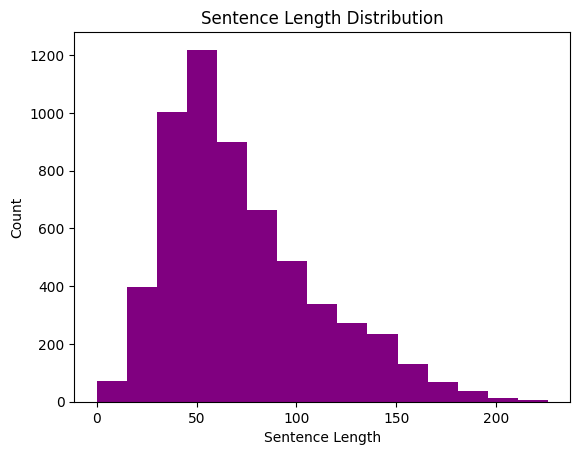

In [33]:
# Create a histogram to visualize the length of sentences
sentence_lengths = df['clean_Sentence'].apply(lambda x: len(x))
plt.hist(sentence_lengths, bins=15, color='Purple')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.show()

In [34]:
from wordcloud import WordCloud

In [35]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud)
    plt.axis('off')
    plt.show()

# Now will Filter out all The Unique Words from all The Sentiments.

In [36]:
Universal_list = df['clean_Sentence'].values.tolist()
df_U = pd.DataFrame(data =df['clean_Sentence'])
df_U.rename(columns = {'clean_Sentence':'ALL CLEAN SENTENCES'}, inplace = True)
df_U

,ALL CLEAN SENTENCES
0,geosolut technolog leverag benefon gp solut pr...
1,esi low bk real possibl
2,last quarter componenta net sale doubl eurm e...
3,accord finnishrussian chamber commerc major co...
4,swedish buyout firm sold remain percent stake...
...,...
5837,rise cost forc packag produc huhtamaki axe jo...
5838,nordic walk first use summer train method cros...
5839,accord ship compani vike line eu decis signifi...
5840,build home improv trade sale decreas eur mn


In [37]:
most_occuring_wordsU = pd.Series(''.join(df_U['ALL CLEAN SENTENCES']).split()).value_counts()[:100]
Most_occuring_wordsU = pd.DataFrame(data =most_occuring_wordsU)
Most_occuring_wordsU.columns =['Count']
Wordu = Most_occuring_wordsU.index
Most_occuring_wordsU['UWords']=Wordu
Most_occuring_wordsU.reset_index()

,index,Count,UWords
0,eur,1626,eur
1,compani,890,compani
2,mn,815,mn
3,profit,594,profit
4,oper,591,oper
...,...,...,...
95,announc,92,announc
96,area,92,area
97,offer,89,offer
98,deal,89,deal


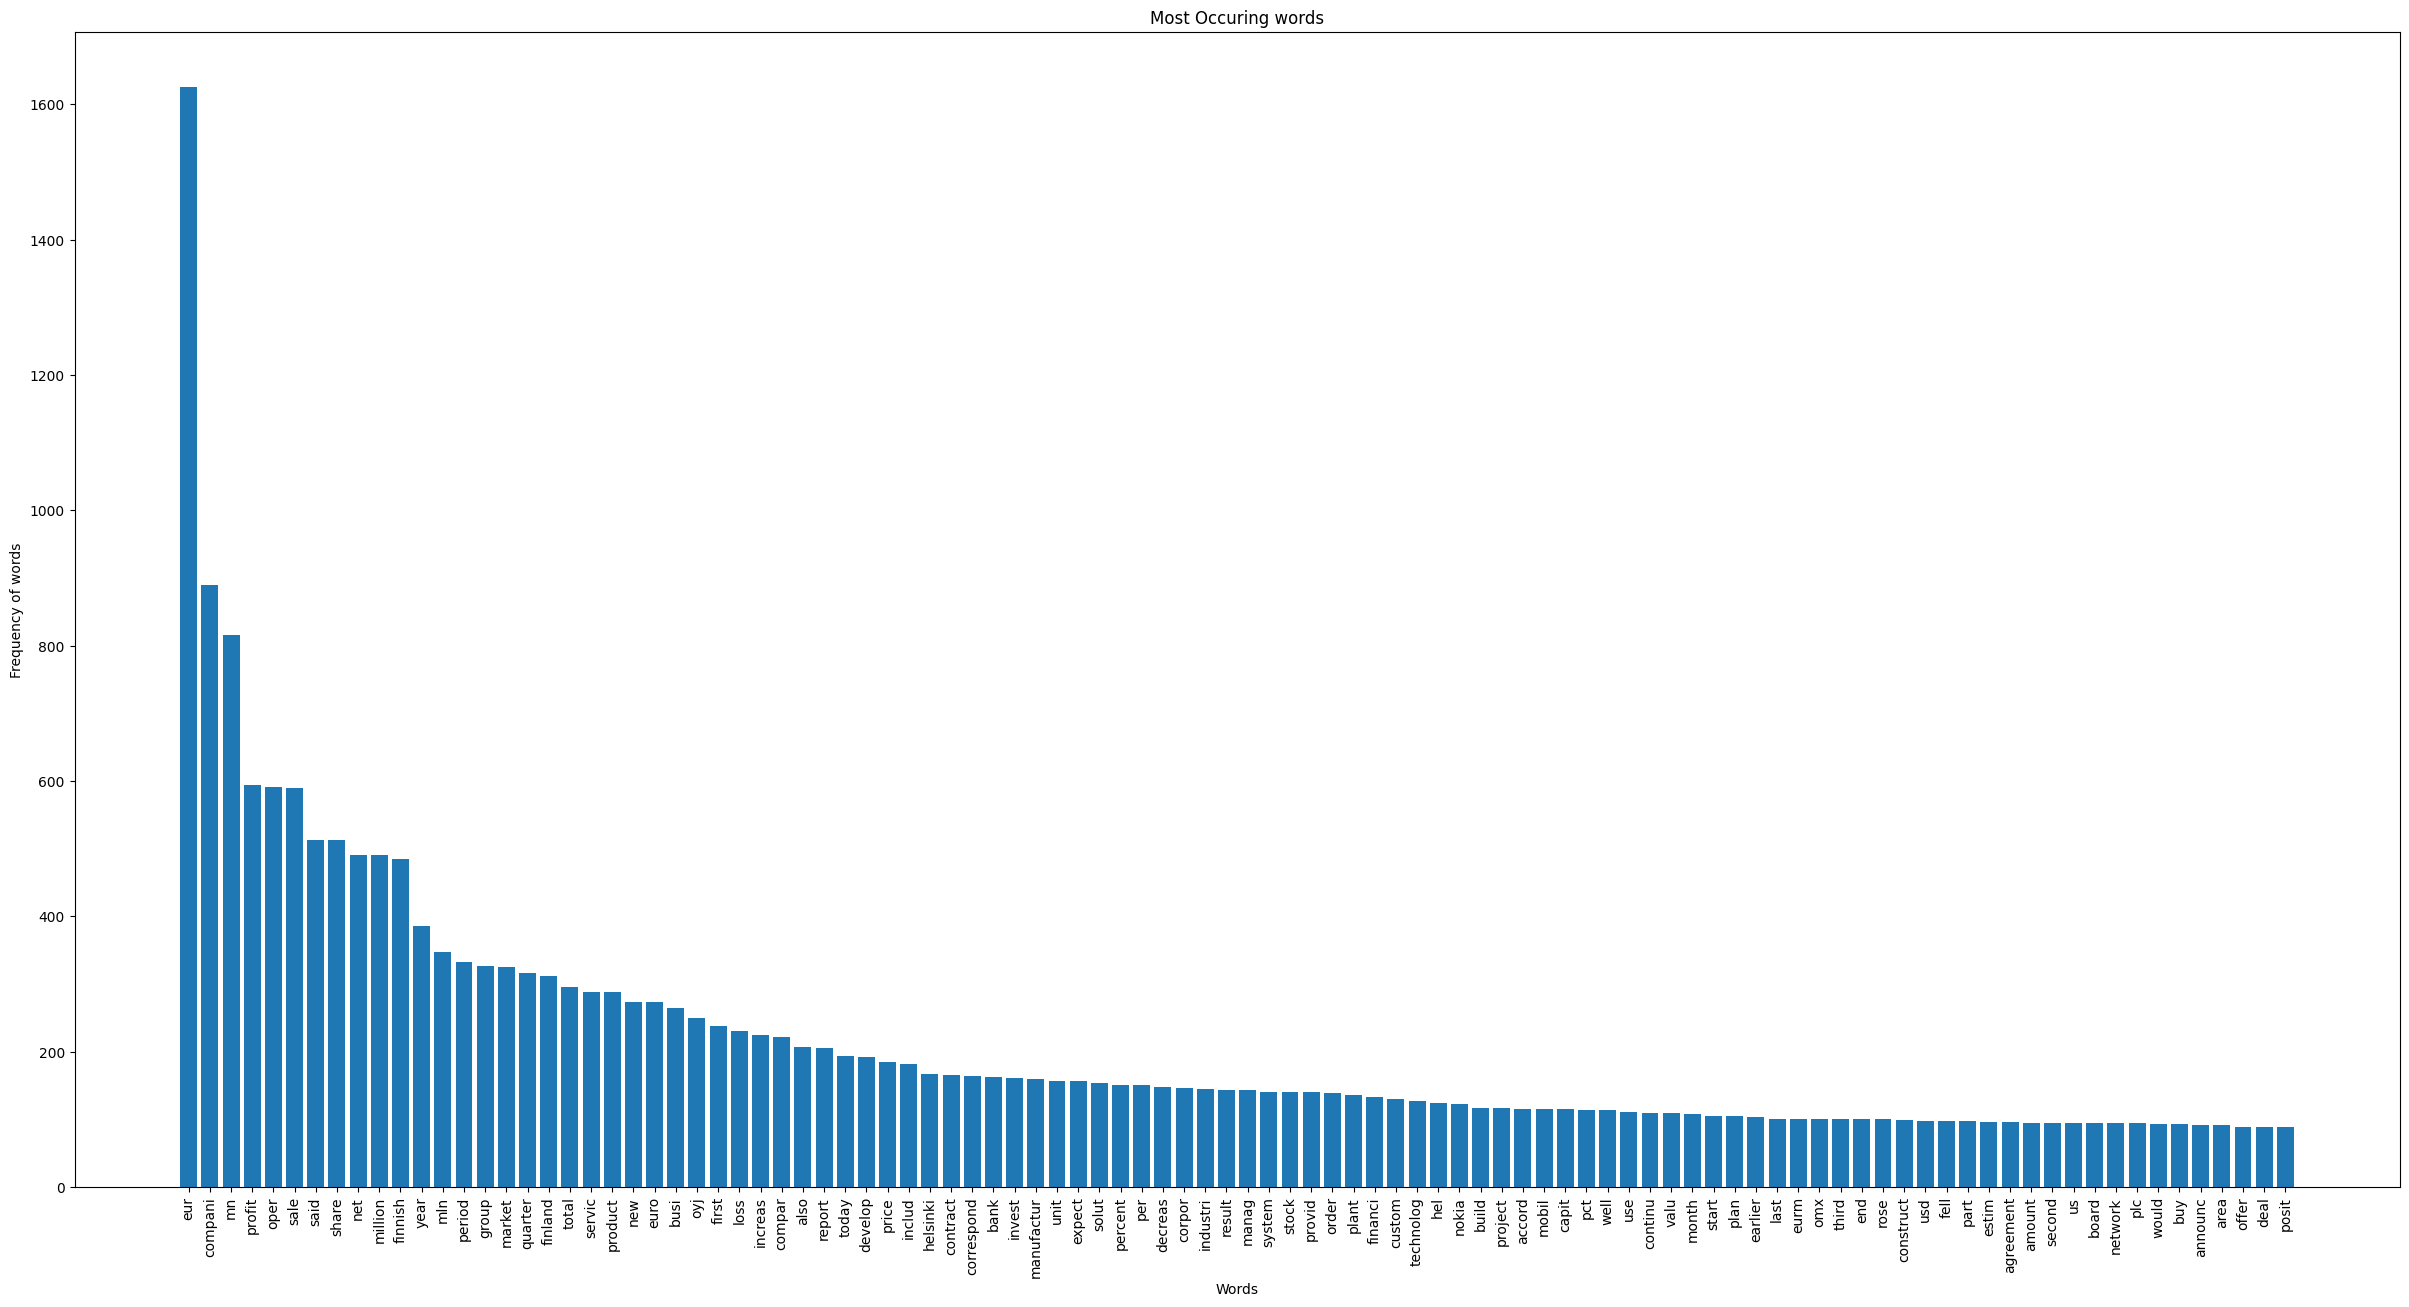

In [38]:
plt.figure(figsize=(30,15))
plt.bar(most_occuring_wordsU.index,most_occuring_wordsU.values)
plt.title("Most Occuring words")
plt.xlabel("Words")
plt.ylabel("Frequency of words")
plt.xticks(rotation=90)
plt.show()

# Positive Sentiment Analysis

In [39]:
positive_list = df[df['Sentiment'] =='positive']['clean_Sentence']
df_6 = pd.DataFrame(data =positive_list)
df_6.rename(columns = {'clean_Sentence':'POSITIVE_SENTENCES'}, inplace = True)
df_6

,POSITIVE_SENTENCES
0,geosolut technolog leverag benefon gp solut pr...
2,last quarter componenta net sale doubl eurm e...
5,spi wouldnt surpris see green close
8,kone net sale rose yearonyear first nine month
10,circul revenu increas finland sweden
...,...
5819,last month ad gild posit start new one bwld se...
5824,newli form compani yit stavo local contact ne...
5825,friend life lift profit hike divi ahead propo...
5836,daili mail parent compani talk potenti partner...


In [40]:
from collections import Counter
positive_docx = ''.join(positive_list)
keyword_po = extract_keywords(positive_docx)
Positive_keywords = pd.DataFrame(data =keyword_po ,index=[0])
PosK= set(Positive_keywords)
Positive_keywords.T

,0
geosolut,1
technolog,50
leverag,3
benefon,5
gp,3
...,...
kostiainen,1
divi,1
takeovdaili,1
parent,1


In [41]:
#MOST OCCURING WORDS IN POSITIVE SENTENCES.
most_occuring_wordsP = pd.Series(''.join(df_6['POSITIVE_SENTENCES']).split()).value_counts()[:100]
Most_occuring_wordsPDF = pd.DataFrame(data =most_occuring_wordsP)
Most_occuring_wordsPDF.columns =['Count']
WordP = Most_occuring_wordsPDF.index
Most_occuring_wordsPDF['PWords']=WordP
Most_occuring_wordsPDF.reset_index()

,index,Count,PWords
0,eur,581,eur
1,mn,257,mn
2,compani,223,compani
3,profit,222,profit
4,sale,217,sale
...,...,...,...
95,rise,30,rise
96,us,30,us
97,estim,30,estim
98,ceo,30,ceo


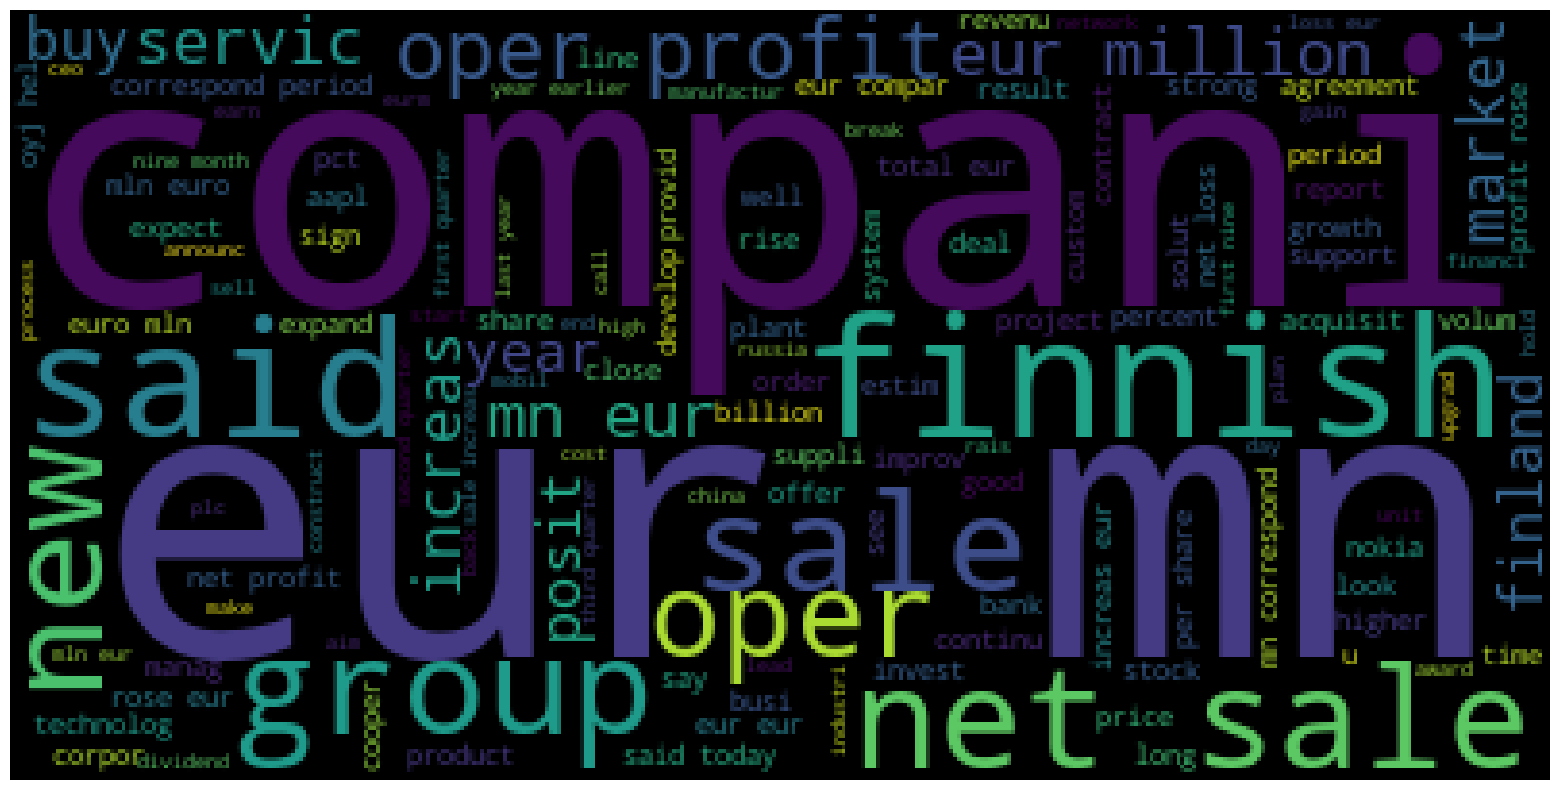

In [42]:
plot_wordcloud(positive_docx)

In [43]:
#plot_most_comman_words(keyword_po)

# Negative Sentences Analysis

In [44]:
#Negative Sentences
negative_list = df[df['Sentiment'] =='negative']['clean_Sentence']
negative_docx = ''.join(negative_list)
df_7 = pd.DataFrame(data =negative_list)
df_7.rename(columns = {'clean_Sentence':'NEGATIVE_SENTENCES'}, inplace = True)
df_7

,NEGATIVE_SENTENCES
1,esi low bk real possibl
6,shell billion bg deal meet sharehold skeptic
7,ssh commun secur corp stock exchang releas oct...
11,sap q disappoint softwar licens real problem c...
39,aapl afternoon selloff usual brutal get readi ...
...,...
5829,sbux pm db downgrad pt cut
5831,finnish develop manufactur mobil phone charger...
5832,oper profit fell eur mn eur mn
5835,hsbc say unit book million charg settlement


In [45]:
# Negative KeyWords

keyword_neg = extract_keywords(negative_docx)
Negative_Keywords = pd.DataFrame(data =keyword_neg,index=[0])
NegK= set(Negative_Keywords)
Negative_Keywords.T

,0
esi,1
low,12
bk,1
real,4
possiblshell,1
...,...
periodsbux,1
db,1
salv,1
settlementrise,1


In [46]:
#MOST OCCURING WORDS IN Negative SENTENCES.
most_occuring_wordsN = pd.Series(''.join(df_7['NEGATIVE_SENTENCES']).split()).value_counts()[:100]
Most_occuring_wordsNDF = pd.DataFrame(data =most_occuring_wordsN)
Most_occuring_wordsNDF.columns =['Count']
WordN = Most_occuring_wordsNDF.index
Most_occuring_wordsNDF['NWords']=WordN
Most_occuring_wordsNDF

,Count,NWords
eur,376,eur
mn,233,mn
profit,155,profit
sale,106,sale
net,97,net
...,...,...
warn,13,warn
financi,13,financi
look,13,look
march,13,march


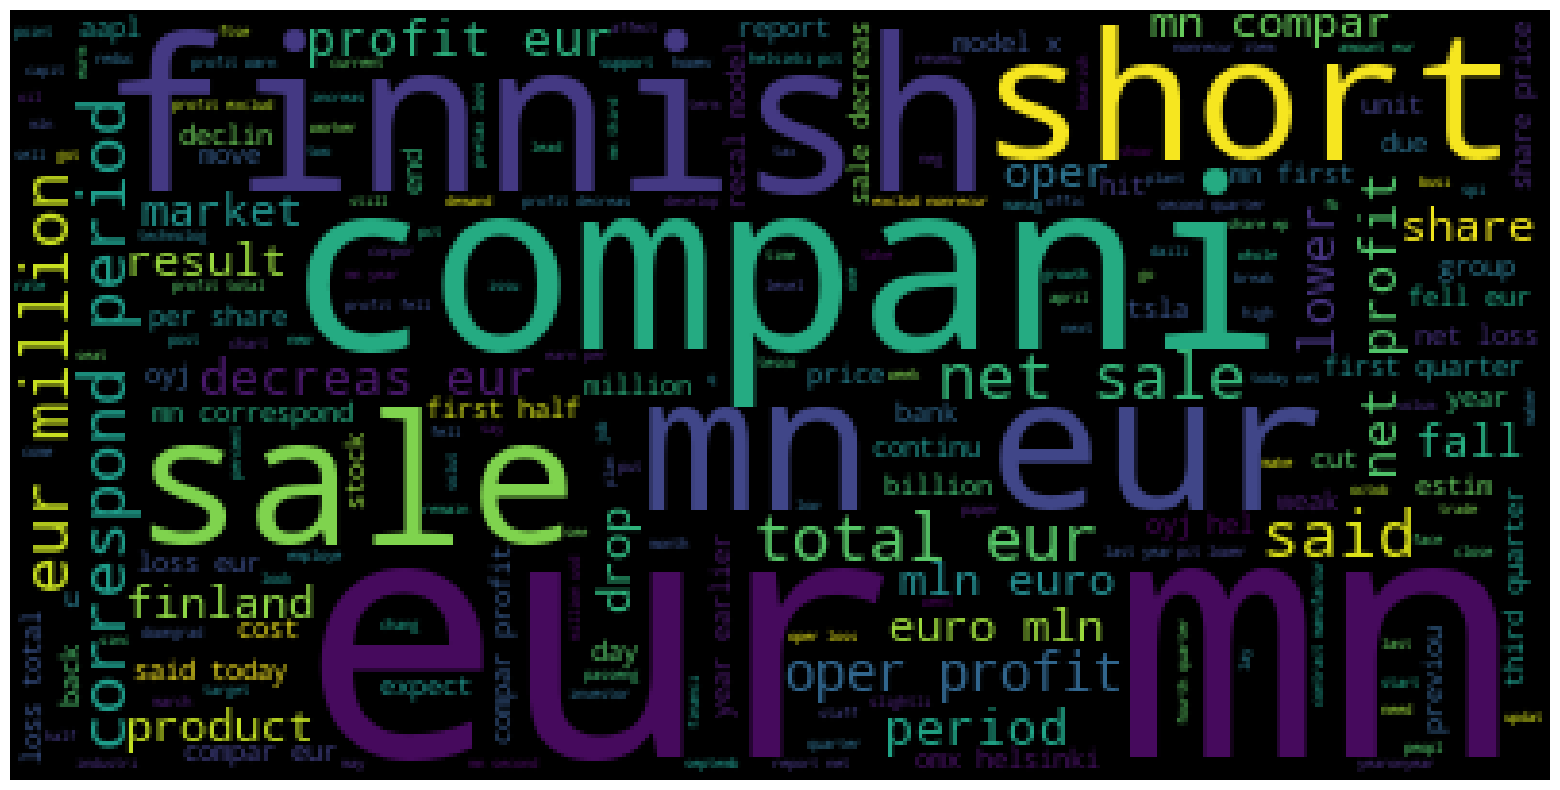

In [47]:
plot_wordcloud(negative_docx)

In [48]:
#plot_most_comman_words(keyword_neg)

# Neutral Sentences Analysis

In [49]:
#Neutral Sentences
neutral_list = df[df['Sentiment'] =='neutral']['clean_Sentence']
neutral_docx = ''.join(neutral_list)
df_8 = pd.DataFrame(data =neutral_list)
df_8.rename(columns = {'clean_Sentence':'NEUTRAL_SENTENCES'}, inplace = True)
df_8

,NEUTRAL_SENTENCES
3,accord finnishrussian chamber commerc major co...
4,swedish buyout firm sold remain percent stake...
9,stockmann depart store total floor space squa...
13,vike line cancel servic
14,ahlstrom corpor stock exchang announc total ...
...,...
5833,kemira record revenu approxim eur billion st...
5834,invest product develop stood mln euro mln
5838,nordic walk first use summer train method cros...
5839,accord ship compani vike line eu decis signifi...


In [50]:
#Neutral KeyWord
keyword_neu = extract_keywords(neutral_docx)
Neutral_Keywords = pd.DataFrame(data =keyword_neu,index=[0])
NeuK= set(Neutral_Keywords)
Neutral_Keywords.T

,0
accord,88
finnishrussian,1
chamber,2
commerc,2
major,33
...,...
charterrival,1
bo,1
endaugust,1
iii,1


In [51]:
# Most Occuuring words in Neutral Sentences
most_occuring_words_Neu = pd.Series(''.join(df_8['NEUTRAL_SENTENCES']).split()).value_counts()[:100]
Most_occuring_wordsNEUDF = pd.DataFrame(data =most_occuring_words_Neu)
Most_occuring_wordsNEUDF.columns =['Count']
WordNeu = Most_occuring_wordsNEUDF.index
Most_occuring_wordsNEUDF['NeuWords']=WordNeu
Most_occuring_wordsNEUDF

,Count,NeuWords
eur,668,eur
compani,594,compani
share,331,share
mn,325,mn
oper,325,oper
...,...,...
equip,55,equip
plc,54,plc
number,54,number
inform,54,inform


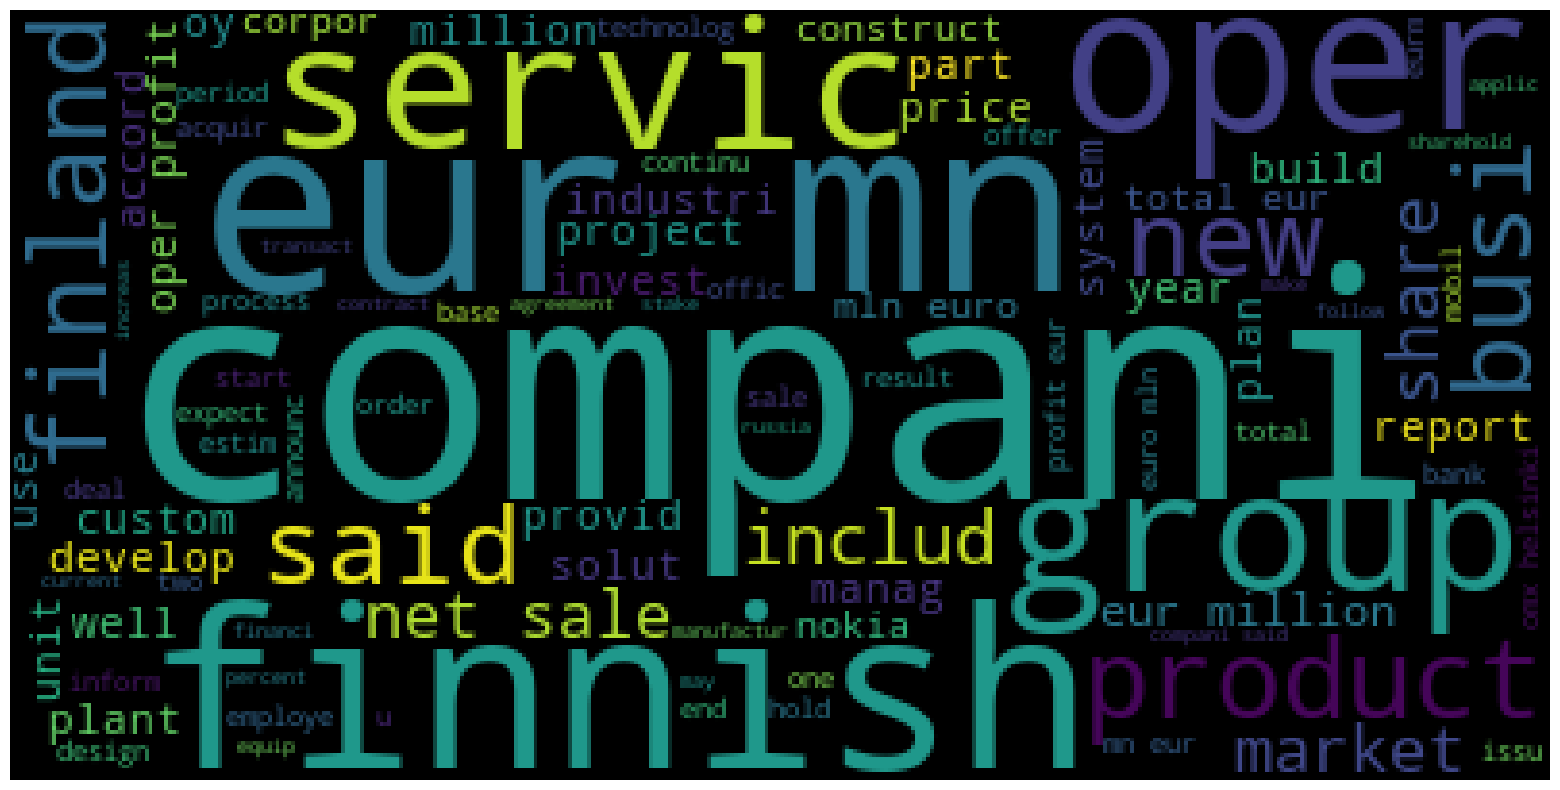

In [52]:
plot_wordcloud(neutral_docx)

In [53]:
#plot_most_comman_words(keyword_neu)

# Creating Sets for Set Operations.

In [54]:
set1 = set(Most_occuring_wordsPDF['PWords'])  # Set of Most Occuring Positive Words
set2 = set(Most_occuring_wordsNDF['NWords'])  #Set of Most Occuring Negative Words 
set3 = set(Most_occuring_wordsNEUDF['NeuWords']) #Set of Most Occuring Neutral Words
setU = set(Most_occuring_wordsU['UWords']) #Set of All The Occuring Words

In [55]:
result1 = set1.union(set2, set3)
print(result1)

{'hit', 'total', 'solut', 'oper', 'rise', 'pretax', 'offer', 'valu', 'manufactur', 'maker', 'order', 'exclud', 'product', 'billion', 'construct', 'said', 'period', 'agreement', 'weak', 'announc', 'million', 'process', 'short', 'item', 'design', 'volum', 'offic', 'half', 'develop', 'continu', 'right', 'higher', 'fell', 'issu', 'move', 'suppli', 'long', 'market', 'custom', 'model', 'helsinki', 'gener', 'net', 'ep', 'provid', 'base', 'award', 'growth', 'sale', 'sell', 'back', 'project', 'decreas', 'good', 'oy', 'lower', 'day', 'neg', 'also', 'cut', 'includ', 'line', 'recal', 'oyj', 'aapl', 'euro', 'nonrecur', 'posit', 'ceo', 'close', 'sign', 'earlier', 'omx', 'spi', 'usd', 'equip', 'revenu', 'rose', 'fall', 'mn', 'grew', 'third', 'see', 'number', 'expect', 'inform', 'technolog', 'end', 'compani', 'profit', 'servic', 'hel', 'compar', 'annual', 'time', 'us', 'buy', 'well', 'contract', 'plc', 'quarter', 'unit', 'tsla', 'busi', 'mln', 'industri', 'percent', 'price', 'mobil', 'build', 'approxi

In [56]:
print(set1)

{'total', 'solut', 'oper', 'rise', 'offer', 'manufactur', 'maker', 'order', 'product', 'billion', 'said', 'period', 'agreement', 'million', 'volum', 'develop', 'continu', 'higher', 'suppli', 'long', 'market', 'custom', 'net', 'provid', 'award', 'growth', 'sale', 'good', 'also', 'line', 'oyj', 'aapl', 'euro', 'posit', 'ceo', 'close', 'sign', 'earlier', 'revenu', 'rose', 'mn', 'grew', 'third', 'see', 'expect', 'technolog', 'compani', 'profit', 'servic', 'hel', 'compar', 'time', 'buy', 'us', 'well', 'plc', 'contract', 'quarter', 'busi', 'mln', 'industri', 'percent', 'price', 'mobil', 'high', 'finnish', 'invest', 'new', 'financi', 'correspond', 'share', 'result', 'look', 'bank', 'eurm', 'first', 'eur', 'last', 'increas', 'nokia', 'cost', 'manag', 'estim', 'group', 'acquisit', 'earn', 'strong', 'network', 'second', 'finland', 'improv', 'today', 'per', 'month', 'corpor', 'year', 'system', 'loss', 'stock', 'report'}


In [57]:
print(set2)

{'hit', 'total', 'oper', 'pretax', 'manufactur', 'maker', 'exclud', 'product', 'billion', 'period', 'said', 'weak', 'million', 'short', 'item', 'half', 'continu', 'fell', 'issu', 'move', 'market', 'model', 'helsinki', 'net', 'ep', 'sale', 'sell', 'back', 'decreas', 'lower', 'day', 'neg', 'also', 'cut', 'recal', 'oyj', 'aapl', 'euro', 'nonrecur', 'omx', 'earlier', 'spi', 'usd', 'close', 'fall', 'mn', 'third', 'expect', 'end', 'compani', 'profit', 'hel', 'compar', 'time', 'us', 'contract', 'quarter', 'unit', 'tsla', 'mln', 'price', 'percent', 'finnish', 'drop', 'new', 'pct', 'q', 'financi', 'correspond', 'share', 'result', 'look', 'bank', 'eurm', 'first', 'eur', 'last', 'cost', 'staff', 'post', 'estim', 'group', 'march', 'earn', 'job', 'second', 'finland', 'today', 'due', 'per', 'x', 'warn', 'month', 'amount', 'year', 'declin', 'system', 'loss', 'stock', 'report'}


In [58]:
print(set3)

{'total', 'solut', 'oper', 'offer', 'valu', 'manufactur', 'order', 'construct', 'product', 'said', 'period', 'announc', 'million', 'process', 'loss', 'design', 'offic', 'develop', 'right', 'issu', 'market', 'custom', 'helsinki', 'gener', 'net', 'provid', 'base', 'sale', 'project', 'oy', 'decreas', 'also', 'includ', 'oyj', 'euro', 'omx', 'equip', 'mn', 'number', 'expect', 'inform', 'technolog', 'end', 'compani', 'profit', 'servic', 'hel', 'compar', 'annual', 'well', 'contract', 'plc', 'quarter', 'unit', 'busi', 'mln', 'industri', 'price', 'percent', 'build', 'approxim', 'finnish', 'plant', 'invest', 'use', 'board', 'new', 'pct', 'area', 'financi', 'correspond', 'capit', 'share', 'start', 'result', 'bank', 'first', 'eur', 'nokia', 'manag', 'group', 'option', 'would', 'part', 'employe', 'accord', 'network', 'deal', 'finland', 'today', 'per', 'corpor', 'amount', 'year', 'plan', 'system', 'media', 'mobil', 'stock', 'report'}


##  Set A contains Top 100 most comman Positive  words; Set B Contains Top 100 most Negative Words; Set C Contains Top 100 most Comman Neutral Words.
##### For Finding Out The Unique Words in Sentneces Having Positive Sentences we have to perfom a  Set Operation of A Intersection complement of B union C.





 #### The intersection of A and the complement of B union C can be obtained by finding the elements that are in A and not in B union C.



 We first find the union of B and C using the union() method, and then find the complement by checking which words from the set of all words are not in the union. The resulting complement is stored in the complement variable. Finally, we find the intersection of A and the complement using the intersection() method and store it in the intersection variable. The resulting intersection is printed out.  we first create a set of all words to use in the complement computation, and then check if each word in this set is not in the union of B and C.

In [59]:

A = {'and', 'be', 'compared', 'second', 'million', 'solutions', 'm', 'to', 'plc', 'period', 'at', 'eurm', 'per', 'more', 'stks', 'which', 'buy', 'corresponding', 'last', 'earlier', 'quarter', 'contract', 'than', 'loss', 'after', 'i', 'in', 'stock', 'mn', 'earnings', 'higher', 'operating', 'euro', 'finland', 't', 'company', 'oyj', 'we', 'co', 'from', 'signed', 'is', 'agreement', 'now', 'a', 'has', 'long', 'by', 'technology', 'share', 'percent', 'increased', 'also', 'market', 'rose', 'for', 'sales', 'with', 'our', 'first', 'aapl', 'been', 'eur', 'business', 'over', 'mln', 'the', 'profit', 'hel', 'net', 'an', 'increase', 'its', 'order', 'up', 'services', 'on', 'as', 'that', 'operations', 'year', 'same', 's', 'of', 'new', 'growth', 'price', 'this', 'said', 'finnish', 'today', 'are', 'http', 'https', 'will', 'it', 'was', 'group', 'good', 'have'}
B = {'and', 'be', 'compared', 'second', 'million', 'm', 'to', 'before', 'period', 'at', 'per', 'stks', 'which', 'corresponding', 'helsinki', 'earlier', 'pct', 'quarter', 'back', 'than', 'loss', 'january', 'after', 'i', 'not', 'in', 'totaled', 'mn', 'operating', 'spy', 'about', 'euro', 'finland', 't', 'company', 'oyj', 'model', 'co', 'usd', 'from', 'x', 'is', 'fall', 'a', 'has', 'half', 'third', 'by', 'bank', 'shares', 'totalled', 'share', 'percent', 'market', 'for', 'sales', 'with', 'down', 'first', 'off', 'short', 'fell', 'result', 'aapl', 'been', 'eur', 'decreased', 'over', 'mln', 'the', 'profit', 'hel', 'net', 'its', 'up', 'on', 'as', 'that', 'omx', 'year', 'same', 'some', 's', 'of', 'tsla', 'price', 'this', 'said', 'finnish', 'today', 'are', 'http', 'lower', 'items', 'https', 'will', 'it', 'was', 'group', 'have'}            
C = {'and', 'their', 'be', 'building', 'compared', 'million', 'm', 'to', 'period', 'well', 'at', 'per', 'which', 'helsinki', 'oy', 'quarter', 'contract', 'board', 'than', 'companies', 'loss', 'according', 'value', 'january', 'products', 'not', 'in', 'stock', 'mn', 'unit', 'operating', 'about', 'production', 'euro', 'based', 'finland', 'construction', 'company', 'oyj', 'corporation', 'from', 'financial', 'is', 'a', 'has', 'other', 'or', 'capital', 'one', 'by', 'bank', 'shares', 'share', 'nokia', 'also', 'market', 'investment', 'development', 'for', 'sales', 'with', 'down', 'first', 'mobile', 'been', 'eur', 'business', 'part', 'decreased', 'plant', 'mln', 'the', 'profit', 'net', 'an', 'service', 'its', 'up', 'services', 'were', 'on', 'as', 'that', 'operations', 'year', 'total', 'some', 's', 'of', 'new', 'this', 'said', 'finnish', 'today', 'are', 'will', 'it', 'was', 'group', 'have'}
      

In [60]:
#Printing All The Positive Unique Words Wich Do not Exist in Both Negative and Neutral Sentences.
complementP = {word for word in A.union(B, C) if word not in B.union(C)}
intersectionP = A.intersection(complementP)

print(intersectionP)

{'eurm', 'growth', 'good', 'last', 'buy', 'solutions', 'order', 'now', 'technology', 'agreement', 'we', 'more', 'our', 'increase', 'rose', 'signed', 'increased', 'higher', 'long', 'earnings', 'plc'}


In [61]:
#Printing All The Negative Unique Words Wich Do not Exist in Both Positive and Neutral Sentences.
complementN= {word for word in B.union(C ,A)  if word not in C.union(A)}
intersectionN = B.intersection(complementN)

print(intersectionN) #34 words

{'result', 'totaled', 'tsla', 'back', 'lower', 'spy', 'totalled', 'omx', 'usd', 'items', 'short', 'fall', 'pct', 'third', 'half', 'x', 'fell', 'off', 'before', 'model'}


In [62]:
#Printing All The Neutral Unique Words Wich Do not Exist in Both Negative and Positive Sentences.
complementNeu= {word for word in C.union(A, B) if word not in A.union(B)}
intersectionNeu = C.intersection(complementNeu)

print(intersectionNeu)

{'unit', 'capital', 'other', 'total', 'mobile', 'were', 'oy', 'building', 'nokia', 'value', 'production', 'construction', 'investment', 'plant', 'service', 'part', 'board', 'based', 'their', 'products', 'development', 'financial', 'corporation', 'one', 'companies', 'or', 'according', 'well'}



result = A - (B.union(C))
print(result)


# Finding all the unique Keywords Which Do not Overlap in any other Sentiment

In [63]:
#ALL Positive Keywordd
Pkresult = PosK - (NegK.union(NeuK)) 
print(Pkresult)

{'ryanairmorn', 'fintech', 'kraftlin', 'phew', 'fia', 'saarinen', 'fokker', 'conagra', 'ticaret', 'outperform', 'lankapaja', 'endo', 'aheadalso', 'hast', 'repaid', 'qualitytasti', 'tellab', 'reslili', 'bt', 'norsun', 'java', 'endaccord', 'do', 'paran', 'roughwft', 'bloombergastrazeneca', 'insuralso', 'aer', 'plnr', 'karput', 'biofuelfir', 'qcomaim', 'isr', 'goodid', 'underwritten', 'kkd', 'lafarg', 'kyronsalmi', 'bagdona', 'bullishcommod', 'talktalknasdaq', 'brasil', 'timewould', 'fanfar', 'staffer', 'thirst', 'caterpillar', 'highoper', 'grupe', 'resistplan', 'smallcap', 'banknet', 'bosniaherzegovina', 'mcguir', 'vmw', 'matteraria', 'regina', 'klabin', 'historconsolid', 'farbbri', 'teflon', 'scti', 'confid', 'entrepreneur', 'courtship', 'partihallsfrbindelsen', 'adob', 'netflix', 'amber', 'dealmformat', 'cto', 'todayvxx', 'readytarget', 'asm', 'cablhowev', 'bsx', 'aluminij', 'justdrink', 'ssi', 'risen', 'redhot', 'christoph', 'of', 'mileston', 'approachkndi', 'withvik', 'ucb', 'electro

In [64]:
Negresult = NegK - (NeuK.union(PosK)) 
print(Negresult)

{'notebuild', 'rejoictesla', 'slumpoper', 'ofix', 'slv', 'jdst', 'dbo', 'chum', 'overhead', 'dropsale', 'havent', 'modelx', 'aberdeen', 'hodshould', 'emc', 'gundlach', 'doji', 'twtrbobe', 'goodtesla', 'warnoper', 'overboughtupmkymmen', 'bouncbaltic', 'vetr', 'rollfinnair', 'illeg', 'doubt', 'kior', 'germanijanuaryaugust', 'sndk', 'competithand', 'longannounc', 'grpn', 'downgradlondon', 'riskglencor', 'nexttsla', 'lawsuit', 'estimlg', 'igrid', 'stocknflx', 'slapmulti', 'contest', 'xleaccord', 'fxetsla', 'disturbbase', 'anyth', 'attackfb', 'tlt', 'mg', 'vzsale', 'thmehhlf', 'kfinlandbas', 'pressurcapac', 'rebuffearn', 'imearlier', 'optamzn', 'heresold', 'picker', 'gazpromshel', 'su', 'setupoptimist', 'hate', 'plcaapl', 'bacdue', 'skidnet', 'bailout', 'tail', 'pricier', 'opposit', 'clockworkoper', 'judgspi', 'tastlondon', 'leukaemia', 'crack', 'darn', 'blipoper', 'claimfb', 'fearsbux', 'sbuxsabmil', 'areafinnish', 'bloat', 'gilead', 'penaltipetrofac', 'massiv', 'scandaladdit', 'vwapearn',

In [65]:
Neuresult = NeuK - (PosK.union(NegK)) 
print(Neuresult)

{'forssan', 'bitmap', 'dongguan', 'chore', 'reproduct', 'wwwmosmetroru', 'viabl', 'legisl', 'nn', 'tuuri', 'teenag', 'sole', 'j', 'hull', 'promo', 'prnit', 'du', 'calaf', 'ervi', 'trout', 'wwwkauppalehtifil', 'businesssummit', 'sech', 'supermercado', 'byland', 'gw', 'desktop', 'reftel', 'everywher', 'enefit', 'chu', 'wacki', 'helsingin', 'has', 'sort', 'genvec', 'petri', 'city', 'fki', 'satisfactorili', 'demograph', 'eberl', 'counti', 'avalon', 'except', 'korteniemi', 'businesstobusi', 'common', 'sacanfil', 'nish', 'suomen', 'innovaruio', 'cidco', 'hp', 'raiffeisenbankinggroup', 'cardona', 'inspector', 'marietta', 'other', 'greatest', 'egypt', 'sslvpn', 'nielsen', 'fim', 'middleeast', 'merchandis', 'suomi', 'prevail', 'kilo', 'cph', 'contextu', 'btt', 'cayman', 'breez', 'beckham', 'campofrio', 'costanza', 'poser', 'altima', 'retailwholesal', 'telgua', 'gram', 'tab', 'intens', 'celebr', 'liftaway', 'pge', 'basel', 'hankkijamaatal', 'elit', 'n', 'bioethanol', 'belgian', 'cido', 'eurobond

In [66]:
# create three lists of words
#Unique_Positive_Words = ['1', 'posit', 'improv', 'award', 'increas', 'grew', 'growth', 'look', 'suppli', 'time', 'plc', 'higher', 'high', 'line', 'good', 'revenu', 'offer', 'long', 'agreement', 'buy', 'strong', 'rose', 'earn', 'sign']
#Unique_Negative_Words = ['item', 'spi', 'day', 'fell', 'lower', 'tsla', 'exclud', 'staff', 'usd', 'short', 'job', 'fall', 'half', 'back', 'estim', 'model', 'declin', 'cut', 'move', 'pretax', '5', 'us', '25', 'weak', 'x', 'due', 'drop', 'hit', '6', 'billion', 'sell', 'recal', '2700', '2']
#Unique_Neutral_Words = ['valu', 'base', 'design', 'process', 'gener', 'announc', 'deal', 'project', 'accord', 'would', 'plan', 'use', 'board', 'approxim', 'start', 'construct', 'includ', 'right', 'financi', 'oy', 'option', 'offic', 'build', 'part', 'plant', 'capit', 'annual', 'area', 'media', 'employe']                                                                   

In [67]:
stoplist = stopwords.words('english') + ['though']

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(1,1))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['clean_Sentence'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
Unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'Frequency', 1:'Unigram'})
Unigram.iloc[:100]

,Frequency,Unigram
0,1627,eur
1,917,compani
2,815,mn
3,633,oper
4,607,sale
...,...,...
95,94,network
96,94,announc
97,93,would
98,91,posit


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['clean_Sentence'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
Bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
Bigram.iloc[:100]
#fig = px.bar(df_ngram.iloc[:100], x="frequency", y="bigram", title='Commmon unigram in Negative Reviews', orientation='h', width=700, height=700,color='bigram')
#fig.show()

,frequency,bigram
0,774,eur mn
1,276,net sale
2,245,eur million
3,243,oper profit
4,195,mn eur
...,...,...
95,22,baltic countri
96,21,xac million
97,21,previou year
98,21,period year


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['clean_Sentence'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
Trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'Trigram'})
Trigram

,frequency,Trigram
0,193,mn eur mn
1,191,eur mn eur
2,126,mln euro mln
3,123,total eur mn
4,85,mn correspond period
...,...,...
41841,1,aapl aapl gundlach
41842,1,aapl aapl final
41843,1,aaltonen finland develop
41844,1,aalto univers univers


## Text Polarity
We then can calculate the sentiment through the polarity function. polarity ranges from -1 to 1, with -1 being negative and 1 being positive. The TextBlob can also use the subjectivity function to calculate subjectivity, which ranges from 0 to 1, with 0 being objective and 1 being subjective.

In [72]:
 from textblob import TextBlob
df['polarity'] = df['clean_Sentence'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['clean_Sentence'].apply(lambda x: TextBlob(x).subjectivity)
df.iloc[:50]

,Sentence,Sentiment,clean_Sentence,polarity,subjective
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...,-0.331818,0.727273
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibl,0.100000,0.300000
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubl eurm e...,0.000000,0.188889
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnishrussian chamber commerc major co...,0.062500,0.500000
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain percent stake...,-0.100000,0.233333
5,$SPY wouldn't be surprised to see a green close,positive,spi wouldnt surpris see green close,-0.200000,0.300000
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,shell billion bg deal meet sharehold skeptic,0.000000,0.000000
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,ssh commun secur corp stock exchang releas oct...,0.350000,0.550000
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,kone net sale rose yearonyear first nine month,0.283333,0.427778
9,The Stockmann department store will have a tot...,neutral,stockmann depart store total floor space squa...,0.000000,0.750000


In [73]:
common_unibigrams = pd.merge(Unigram, Bigram, left_on='Unigram', right_on='bigram', how='inner')


In [74]:
common_unibitrigrams = pd.merge(common_unibigrams, Trigram, left_on='Unigram', right_on='Trigram', how='inner')

In [75]:
unique_unigrams = set(Unigram['Unigram']) - set(common_unibitrigrams['Unigram'])


In [76]:
unique_bigrams = set(Bigram['bigram']) - set(common_unibitrigrams['bigram'])
unique_trigrams = set(Trigram['Trigram']) - set(common_unibitrigrams['Trigram'])


In [77]:
print(unique_bigrams)

{'summer major', 'media corpor', 'bring bank', 'novel enefit', 'item eur', 'trend continu', 'pestka compani', 'iyt transport', 'patient activ', 'target structur', 'lunch serv', 'exampl sound', 'cover ship', 'interfac invent', 'close new', 'year product', 'lead advisor', 'price seen', 'engag fall', 'depart store', 'master busi', 'daili volum', 'provid lowdown', 'global made', 'plc recoveri', 'metr fix', 'sought topic', 'sampo plc', 'nordic group', 'unbroken video', 'ceo elcoteq', 'pari come', 'loan financi', 'eaton power', 'see jwn', 'bp area', 'increas wood', 'ceo jukka', 'close deal', 'vendor ruukki', 'uk sale', 'norwegian solar', 'color littl', 'biofuelsbas product', 'earn rise', 'associ adac', 'roro fleet', 'around could', 'eur stronger', 'target weak', 'share carri', 'new compani', 'chang fish', 'usd type', 'deal effect', 'tendenc toward', 'local one', 'multimedia net', 'licens consortium', 'video intern', 'cent per', 'baltic oper', 'intern machineri', 'august pm', 'recycl materi',

In [78]:
print(unique_trigrams)

{'go forward said', 'weekli call volum', 'efor presenc also', 'bubbl might go', 'finnish publish alma', 'dc jump percent', 'charger monday post', 'ga clean sulphur', 'beer consumpt took', 'radio network bt', 'identifi remot radio', 'subject council local', 'servic area network', 'pearson expect grow', 'grew eur million', 'quarter report thursday', 'quarter apriljun amount', 'easyjet lead britain', 'finland poland follow', 'adat file applic', 'bn largest cash', 'sanit infrastructur bukoba', 'sell stake uzbek', 'billion breakup fee', 'immedi due final', 'design phone result', 'downgrad barclay rb', 'de desarrollo urbano', 'loss eur first', 'month compar eur', 'may take sever', 'cours new car', 'life possibl counter', 'buy everyon sell', 'develop acquir land', 'servic centr nordic', 'employ total approxim', 'technolog contract manufactur', 'adequaci ratio act', 'compani exit contract', 'tm recent learn', 'bbri actual lost', 'enso also meet', 'kalmar macgregor solut', 'chirnsid plant uk', 

In [79]:

common_bigrams = set(Bigram['bigram']).intersection(set(common_unibitrigrams['bigram']))
common_trigrams = set(Trigram['Trigram']).intersection(set(common_unibitrigrams['Trigram']))


 you can use the intersection operation to find the words that are present in both sets of bigrams/trigrams. 


This will give you sets of bigrams and trigrams that are present in both the original set and the common set. You can use these common bigrams/trigrams in to capture important patterns and relationships in the text data.

In [80]:
features = list(common_unibitrigrams['Unigram']) + list(common_bigrams) + list(common_trigrams) + list(unique_bigrams) + list(unique_trigrams)
df_features= pd.DataFrame({'Features': features})
df_features

,Features
0,summer major
1,media corpor
2,bring bank
3,novel enefit
4,item eur
...,...
80173,finland oy hold
80174,turnov one billion
80175,see jwn sk
80176,broker highlight cargotec


In [81]:


# Define a function to calculate sentiment and subjectivity of a sentence
def get_sentiment_subjectivity(sentence):
    blob = TextBlob(sentence)
    sentiment = blob.sentiment.polarity
    
    if sentiment > 0:
        return "positive", sentiment
    elif sentiment < 0:
        return "negative", sentiment
    else:
        return "neutral", sentiment

# Apply the function to the 'clean_Sentence' column of your DataFrame and store the results in new columns
df['sentiment'], df['polarity'] = zip(*df['clean_Sentence'].apply(get_sentiment_subjectivity))


This will create three new columns named sentiment, polarity, and subjectivity in your DataFrame, which contain the sentiment, polarity, and subjectivity scores of each sentence, respectively.

In [82]:
df

,Sentence,Sentiment,clean_Sentence,polarity,subjective,sentiment
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...,-0.331818,0.727273,negative
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibl,0.100000,0.300000,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubl eurm e...,0.000000,0.188889,neutral
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnishrussian chamber commerc major co...,0.062500,0.500000,positive
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain percent stake...,-0.100000,0.233333,negative
...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rise cost forc packag produc huhtamaki axe jo...,0.000000,0.000000,neutral
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walk first use summer train method cros...,0.250000,0.333333,positive
5839,"According shipping company Viking Line , the E...",neutral,accord ship compani vike line eu decis signifi...,0.000000,0.000000,neutral
5840,"In the building and home improvement trade , s...",neutral,build home improv trade sale decreas eur mn,0.000000,0.000000,neutral


In [83]:
df.drop(['Sentence', 'Sentiment'], axis='columns', inplace=True)


In [84]:
X= df['clean_Sentence']

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [86]:
from sklearn.preprocessing import  LabelEncoder

In [87]:
le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["sentiment"])

In [88]:
df["sentiment"].value_counts()

sentiment
1    3915
2    1361
0     566
Name: count, dtype: int64

In [89]:
#Neutral -3915 ->1
#positive - 1316  ->2
#Negative - 860  ->0

In [90]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

(5842, 5000)

In [91]:
# Declaring our target variable
y = df["sentiment"]
     

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve

# Model1 : Naive Bayes

# Bigram

In [94]:
# Train a Naive Bayes classifier on the vectorized data
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [95]:
# Make predictions on the test set and evaluate the model
y_pred_train_NB = clf.predict(X_train)
y_pred_test_nb = clf.predict(X_test)
acc_train_1 = accuracy_score(y_train, y_pred_train_NB)
acc_test_1 = accuracy_score(y_test, y_pred_test_nb)
cm = confusion_matrix(y_test, y_pred_test_nb)

In [96]:
print("Classification report : \n",classification_report(y_test,y_pred_test_nb))
print("Training Accuracy Score",acc_train_1)
print("Testing Accuracy Score",acc_test_1)

Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.05      0.09       151
           1       0.71      0.99      0.83       964
           2       0.80      0.27      0.41       346

    accuracy                           0.72      1461
   macro avg       0.76      0.44      0.44      1461
weighted avg       0.74      0.72      0.65      1461

Training Accuracy Score 0.795023967130792
Testing Accuracy Score 0.7200547570157426


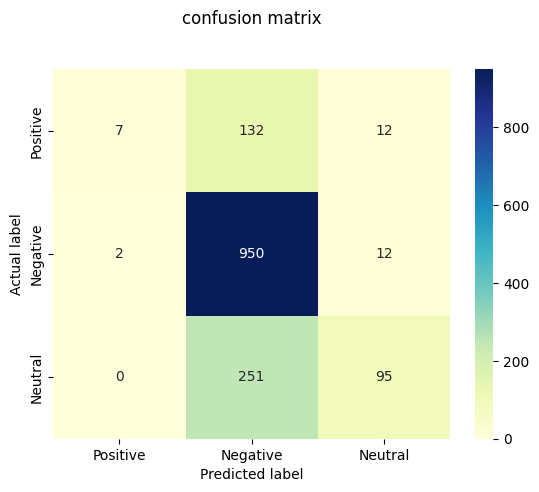

In [97]:
cm = confusion_matrix(y_test,y_pred_test_nb)
class_label = ["Positive", "Negative","Neutral"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Naive Bayes', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

# Trigram

In [98]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (3, 3))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [99]:
# Train a Naive Bayes classifier on the vectorized data
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred_test_nb = clf.predict(X_test)
acc_test_1 = accuracy_score(y_test, y_pred_test_nb)
# Print classification report
print(classification_report(y_test, y_pred_test_nb))
print("Testing Accuracy Score",acc_test_1)

              precision    recall  f1-score   support

           0       1.00      0.06      0.11       151
           1       0.70      0.99      0.82       964
           2       0.76      0.20      0.32       346

    accuracy                           0.70      1461
   macro avg       0.82      0.42      0.42      1461
weighted avg       0.74      0.70      0.63      1461

Testing Accuracy Score 0.7049965776865161


# Unigram

In [100]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (1, 1))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [101]:
# Train a Naive Bayes classifier on the vectorized data
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred_test_nb = clf.predict(X_test)
acc_test_1 = accuracy_score(y_test, y_pred_test_nb)
# Print classification report
print(classification_report(y_test, y_pred_test_nb))
print("Testing Accuracy Score",acc_test_1)

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       151
           1       0.70      0.99      0.82       964
           2       0.76      0.21      0.33       346

    accuracy                           0.71      1461
   macro avg       0.82      0.41      0.40      1461
weighted avg       0.75      0.71      0.63      1461

Testing Accuracy Score 0.7070499657768652


# Model2 : Support vector machine

# Unigram

In [102]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (1, 1))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [103]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_test_svm = clf.predict(X_test)
acc_test_2 = accuracy_score(y_test, y_pred_test_svm)
# Print classification report
print(classification_report(y_test, y_pred_test_svm))
print("Testing Accuracy Score",acc_test_2)

              precision    recall  f1-score   support

           0       0.96      0.34      0.51       151
           1       0.80      1.00      0.89       964
           2       0.97      0.58      0.73       346

    accuracy                           0.83      1461
   macro avg       0.91      0.64      0.71      1461
weighted avg       0.86      0.83      0.81      1461

Testing Accuracy Score 0.8336755646817249


# Trigram

In [104]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (3, 3))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [105]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_test_svm = clf.predict(X_test)
acc_test_2 = accuracy_score(y_test, y_pred_test_svm)
# Print classification report
print(classification_report(y_test, y_pred_test_svm))
print("Testing Accuracy Score",acc_test_2)

              precision    recall  f1-score   support

           0       0.89      0.17      0.28       151
           1       0.70      0.98      0.82       964
           2       0.79      0.17      0.28       346

    accuracy                           0.71      1461
   macro avg       0.79      0.44      0.46      1461
weighted avg       0.74      0.71      0.63      1461

Testing Accuracy Score 0.7063655030800822


# Bigram

In [106]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])
X1 =df["clean_Sentence"]
# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [107]:
# Train a Support Vector Machine classifier on the vectorized data
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [108]:
# Make predictions on the test set and evaluate the model
y_pred_train_SVM = clf.predict(X_train)
y_pred_test_svm = clf.predict(X_test)
acc_train_2 = accuracy_score(y_train, y_pred_train_SVM)
acc_test_2 = accuracy_score(y_test, y_pred_test_svm)
cm = confusion_matrix(y_test, y_pred_test_svm)

In [109]:
print("Classification report : \n",classification_report(y_test,y_pred_test_svm))
print("Training Accuracy Score",acc_train_2)
print("Testing Accuracy Score",acc_test_2)

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.19      0.30       151
           1       0.72      0.99      0.84       964
           2       0.90      0.28      0.43       346

    accuracy                           0.74      1461
   macro avg       0.82      0.49      0.52      1461
weighted avg       0.78      0.74      0.68      1461

Training Accuracy Score 0.8913490070760101
Testing Accuracy Score 0.7392197125256673


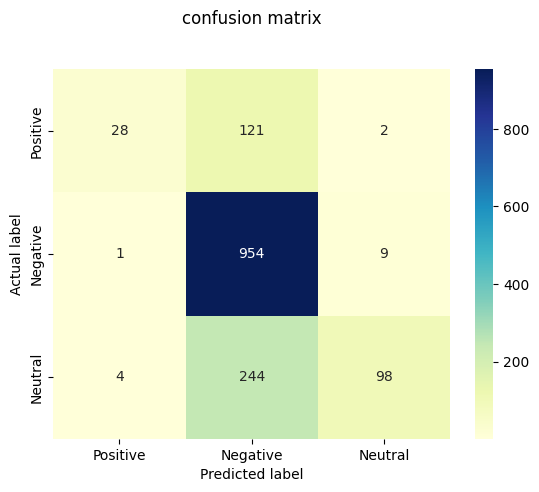

In [110]:
cm = confusion_matrix(y_test,y_pred_test_svm)
class_label = ["Positive", "Negative","Neutral"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Naive Bayes', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

# Model3 : Random Forest

# Unigram

In [111]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (1, 1))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_train_RF = clf.predict(X_train)
y_pred_test_rf = clf.predict(X_test)
acc_train_3 = accuracy_score(y_train, y_pred_train_RF)
acc_test_3 = accuracy_score(y_test, y_pred_test_rf)
# Print classification report
print("Classification Report For training data Set")
print(classification_report(y_train,  y_pred_train_RF))
print("Classification Report For testing data Set")
print(classification_report(y_test, y_pred_test_rf))
print("Training Accuracy Score",acc_train_3)
print("Testing Accuracy Score",acc_test_3)
f1_score_train =f1_score(y_train,clf.predict(X_train),average="weighted")
f1_score_test =f1_score(y_test,clf.predict(X_test),average="weighted")
print("F1 Score training dateset for RandomForest Classifier: %s" % f1_score_train)
print("F1 Score training dateset for RandomForest Classifier: %s" % f1_score_test)

Classification Report For training data Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00      2951
           2       1.00      1.00      1.00      1015

    accuracy                           1.00      4381
   macro avg       1.00      1.00      1.00      4381
weighted avg       1.00      1.00      1.00      4381

Classification Report For testing data Set
              precision    recall  f1-score   support

           0       0.94      0.78      0.86       151
           1       0.95      1.00      0.97       964
           2       0.97      0.91      0.94       346

    accuracy                           0.95      1461
   macro avg       0.95      0.90      0.92      1461
weighted avg       0.95      0.95      0.95      1461

Training Accuracy Score 1.0
Testing Accuracy Score 0.9548254620123203
F1 Score training dateset for RandomForest Classifier: 1.0
F1 Score training date

In [113]:
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
    ('clf', RandomForestClassifier())
])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 42)

In [115]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [116]:
pipe_lr.score(X_test,y_test)

0.9555099247091033

In [117]:
ex1 = "The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [118]:
pipe_lr.predict([ex1])

array([2])

In [119]:
ex2 = "Shell's $70 Billion BG Deal Meets Shareholder Skepticism"

In [120]:
pipe_lr.predict([ex2])

array([1])

In [121]:
ex3 = "The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland ."

In [122]:
pipe_lr.predict([ex3])

array([0])

In [123]:
pipe_lr.predict_proba([ex2])

array([[0., 1., 0.]])

In [124]:
import joblib
pipeline_file = open("finall.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

# Bigram

In [125]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [126]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred_test_rf = clf.predict(X_test)
acc_test_3 = accuracy_score(y_test, y_pred_test_rf)
# Print classification report
print(classification_report(y_test, y_pred_test_rf))
print("Testing Accuracy Score",acc_test_3)

              precision    recall  f1-score   support

           0       0.71      0.29      0.41       151
           1       0.76      0.96      0.85       964
           2       0.80      0.40      0.54       346

    accuracy                           0.76      1461
   macro avg       0.76      0.55      0.60      1461
weighted avg       0.76      0.76      0.73      1461

Testing Accuracy Score 0.7597535934291582


# Trigram

In [127]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (3, 3))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [128]:
# Train a random forest classifier on the vectorized data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
# Make predictions on the test set and evaluate the model
y_pred_train_RF = clf.predict(X_train)
y_pred_test_rf = clf.predict(X_test)
acc_train_3 = accuracy_score(y_train, y_pred_train_RF)
acc_test_3 = accuracy_score(y_test, y_pred_test_rf)
cm = confusion_matrix(y_test, y_pred_test_rf)

In [130]:
print("Classification report : \n",classification_report(y_test,y_pred_test_rf))
print("Training Accuracy Score",acc_train_3)
print("Testing Accuracy Score",acc_test_3)

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.18      0.29       151
           1       0.72      0.97      0.82       964
           2       0.77      0.27      0.40       346

    accuracy                           0.72      1461
   macro avg       0.74      0.47      0.50      1461
weighted avg       0.73      0.72      0.67      1461

Training Accuracy Score 0.8057521113900936
Testing Accuracy Score 0.7207392197125256


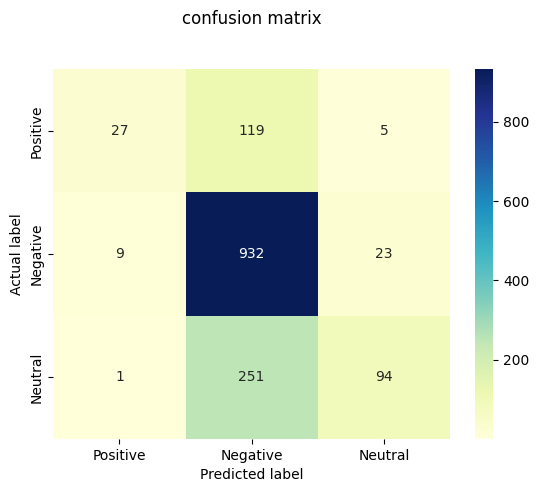

In [131]:
cm = confusion_matrix(y_test,y_pred_test_rf)
class_label = ["Positive", "Negative","Neutral"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Random forest ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

# Model4 : Dicision Tree

# Unigram

In [132]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (1, 1))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [133]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred_train_dt = classifier.predict(X_train)
y_pred_test_dt = classifier.predict(X_test)
acc_train_dt = accuracy_score(y_train, y_pred_train_dt)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
# Print classification report
print("Classification Report For training data Set")
print(classification_report(y_train,  y_pred_train_dt))
print("Classification Report For testing data Set")
print(classification_report(y_test, y_pred_test_dt))
print("Testing Accuracy Score",acc_train_dt)
print("Testing Accuracy Score",acc_test_dt)
f1_score_train =f1_score(y_train,classifier.predict(X_train),average="weighted")
f1_score_test =f1_score(y_test,classifier.predict(X_test),average="weighted")
print("F1 Score training dateset for RandomForest Classifier: %s" % f1_score_train)
print("F1 Score training dateset for RandomForest Classifier: %s" % f1_score_test)

Classification Report For training data Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00      2951
           2       1.00      1.00      1.00      1015

    accuracy                           1.00      4381
   macro avg       1.00      1.00      1.00      4381
weighted avg       1.00      1.00      1.00      4381

Classification Report For testing data Set
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       151
           1       0.98      0.99      0.98       964
           2       0.95      0.95      0.95       346

    accuracy                           0.96      1461
   macro avg       0.95      0.92      0.93      1461
weighted avg       0.96      0.96      0.96      1461

Testing Accuracy Score 1.0
Testing Accuracy Score 0.9637234770704997
F1 Score training dateset for RandomForest Classifier: 1.0
F1 Score training dates

# Trigram

In [134]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (3, 3))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [135]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred_test_dt = classifier.predict(X_test)
acc_test_4 = accuracy_score(y_test, y_pred_test_dt)
# Print classification report
print(classification_report(y_test, y_pred_test_dt))

print("Testing Accuracy Score",acc_test_4)

              precision    recall  f1-score   support

           0       0.62      0.17      0.27       151
           1       0.71      0.96      0.82       964
           2       0.75      0.25      0.38       346

    accuracy                           0.71      1461
   macro avg       0.69      0.46      0.49      1461
weighted avg       0.71      0.71      0.66      1461

Testing Accuracy Score 0.7132101300479123


# Bigram

In [136]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [137]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [138]:
# Make predictions on the test set and evaluate the model
y_pred_train_DT = classifier.predict(X_train)
y_pred_test_dt = classifier.predict(X_test)
acc_train_4 = accuracy_score(y_train, y_pred_train_DT)
acc_test_4 = accuracy_score(y_test, y_pred_test_dt)
cm = confusion_matrix(y_test, y_pred_test_dt)

In [139]:
acc4 = accuracy_score(y_test,y_pred_test_dt)
print("Classification report : \n",classification_report(y_test,y_pred_test_dt))
print("Training Accuracy Score",acc_train_4)
print("Testing Accuracy Score",acc_test_4)

Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.32      0.42       151
           1       0.76      0.92      0.83       964
           2       0.68      0.41      0.51       346

    accuracy                           0.74      1461
   macro avg       0.67      0.55      0.59      1461
weighted avg       0.72      0.74      0.71      1461

Training Accuracy Score 0.9169139465875371
Testing Accuracy Score 0.7364818617385352


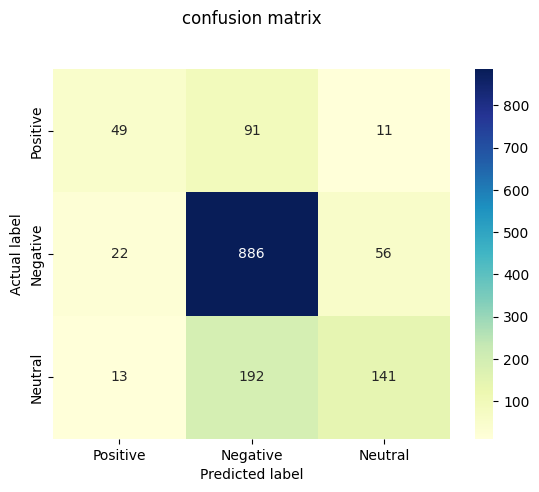

In [140]:
cm = confusion_matrix(y_test,y_pred_test_dt)
class_label = ["Positive", "Negative","Neutral"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Decision Tree ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

# Model5 : K-Nearest Neighbors

# Unigram

In [141]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (1, 1))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [142]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier(n_neighbors=10,p=2)
KNN.fit(X_train, y_train)
y_pred_train_KNN = KNN.predict(X_train)
y_pred_test_knn = KNN.predict(X_test)
acc_train_5 = accuracy_score(y_train, y_pred_train_KNN)
acc_test_5 = accuracy_score(y_test, y_pred_test_knn)


In [143]:
print("Classification report : \n",classification_report(y_test,y_pred_test_knn))
print("Training Accuracy Score",acc_train_5)
print("Testing Accuracy Score",acc_test_5)

Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.15      0.25       151
           1       0.71      0.99      0.83       964
           2       0.81      0.23      0.36       346

    accuracy                           0.72      1461
   macro avg       0.78      0.45      0.48      1461
weighted avg       0.74      0.72      0.66      1461

Training Accuracy Score 0.7589591417484592
Testing Accuracy Score 0.7200547570157426


# Bigram

In [144]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [145]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier(n_neighbors=10,p=2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [146]:
y_pred_train_KNN = KNN.predict(X_train)
y_pred_test_knn = KNN.predict(X_test)
acc_train_5 = accuracy_score(y_train, y_pred_train_KNN)
acc_test_5 = accuracy_score(y_test, y_pred_test_knn)

cm = confusion_matrix(y_test, y_pred_test_knn)

In [147]:
acc5 = accuracy_score(y_test,y_pred_test_knn)
print("Classification report : \n",classification_report(y_test,y_pred_test_knn))
print("Training Accuracy Score",acc_train_5)
print("Testing Accuracy Score",acc_test_5)

Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.01      0.03       151
           1       0.67      1.00      0.80       964
           2       0.86      0.05      0.10       346

    accuracy                           0.67      1461
   macro avg       0.73      0.36      0.31      1461
weighted avg       0.71      0.67      0.56      1461

Training Accuracy Score 0.6973293768545994
Testing Accuracy Score 0.6721423682409309


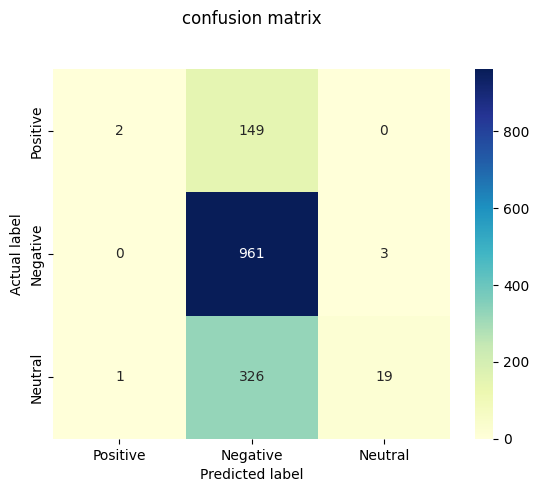

In [148]:
cm = confusion_matrix(y_test,y_pred_test_knn)
class_label = ["Positive", "Negative","Neutral"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Decision Tree ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

# Trigram

In [149]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (3, 3))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["clean_Sentence"])

# Check our matrix shape
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    

In [150]:
from sklearn.neighbors import KNeighborsClassifier
KNN =KNeighborsClassifier(n_neighbors=10,p=2)
KNN.fit(X_train, y_train)
y_pred_train_KNN = KNN.predict(X_train)
y_pred_test_knn = KNN.predict(X_test)
acc_train_5 = accuracy_score(y_train, y_pred_train_KNN)
acc_test_5 = accuracy_score(y_test, y_pred_test_knn)


In [151]:
print("Classification report : \n",classification_report(y_test,y_pred_test_knn))
print("Training Accuracy Score",acc_train_5)
print("Testing Accuracy Score",acc_test_5)

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.66      1.00      0.80       964
           2       1.00      0.02      0.05       346

    accuracy                           0.67      1461
   macro avg       0.55      0.34      0.28      1461
weighted avg       0.67      0.67      0.54      1461

Training Accuracy Score 0.685459940652819
Testing Accuracy Score 0.6652977412731006


In [152]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

In [153]:
X= df['clean_Sentence'].values
y = df["sentiment"].values

In [154]:
# Create unigram, bigram, and trigram models

vectorizer1 = CountVectorizer(ngram_range=(1,1))
vectorizer2 = CountVectorizer(ngram_range=(2,2))
vectorizer3 = CountVectorizer(ngram_range=(3,3))


In [155]:
X1 = vectorizer1.fit_transform(X)
X2 = vectorizer2.fit_transform(X)
X3 = vectorizer3.fit_transform(X)

In [156]:
# Train models and get accuracy scores

models = [
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]


In [157]:
model_names = [
    "Naive Bayes",
    "Support Vector",
    "Random Forest",
    "Decision Tree",
    "K Nearest"
]

In [158]:
import pandas as pd

# create dictionary of model results
results = {
    'Model': ['Naive Bayes', 'Support Vector', 'Random Forest', 'Decision Tree', 'K Nearest'],
    'Unigram Accu': [0.8161576513288841, 0.8507361550169769, 0.9609706123404754, 0.9738086875073175, 0.711398255473598],
    'Bigram Accu': [0.5313224446786091, 0.7292032548881864, 0.7706258049408734, 0.7814087928813956, 0.6745978222690552],
    'Trigram Accu': [0.45378351481091206, 0.7155087226320103, 0.7449502400187331, 0.7434094368340943, 0.6359027046013347],
    'Combined Accu': [0.600421203606135, 0.7651493775123912, 0.8255155524333606, 0.8328756390742692, 0.6739662607813294]
}

# create DataFrame and transpose
df = pd.DataFrame.from_dict(results)
df = df.set_index('Model')

# display DataFrame
print(df)


                Unigram Accu  Bigram Accu  Trigram Accu  Combined Accu
Model                                                                 
Naive Bayes         0.816158     0.531322      0.453784       0.600421
Support Vector      0.850736     0.729203      0.715509       0.765149
Random Forest       0.960971     0.770626      0.744950       0.825516
Decision Tree       0.973809     0.781409      0.743409       0.832876
K Nearest           0.711398     0.674598      0.635903       0.673966


In [159]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
# vectorize data into unigrams, bigrams, and trigrams
cv1 = CountVectorizer(ngram_range=(1,1))
cv2 = CountVectorizer(ngram_range=(2,2))
cv3 = CountVectorizer(ngram_range=(3,3))

X_train_ug = cv1.fit_transform(X_train)
X_train_bg = cv2.fit_transform(X_train)
X_train_tg = cv3.fit_transform(X_train)

X_test_ug = cv1.transform(X_test)
X_test_bg = cv2.transform(X_test)
X_test_tg = cv3.transform(X_test)

# create models
nb_ug = MultinomialNB()
nb_bg = MultinomialNB()
nb_tg = MultinomialNB()

svm_ug = SVC(kernel='linear')
svm_bg = SVC(kernel='linear')
svm_tg = SVC(kernel='linear')

rf_ug = RandomForestClassifier()
rf_bg = RandomForestClassifier()
rf_tg = RandomForestClassifier()

dt_ug = DecisionTreeClassifier()
dt_bg = DecisionTreeClassifier()
dt_tg = DecisionTreeClassifier()

knn_ug = KNeighborsClassifier()
knn_bg = KNeighborsClassifier()
knn_tg = KNeighborsClassifier()

# train models
nb_ug.fit(X_train_ug, y_train)
nb_bg.fit(X_train_bg, y_train)
nb_tg.fit(X_train_tg, y_train)

svm_ug.fit(X_train_ug, y_train)
svm_bg.fit(X_train_bg, y_train)
svm_tg.fit(X_train_tg, y_train)

rf_ug.fit(X_train_ug, y_train)
rf_bg.fit(X_train_bg, y_train)
rf_tg.fit(X_train_tg, y_train)

dt_ug.fit(X_train_ug, y_train)
dt_bg.fit(X_train_bg, y_train)
dt_tg.fit(X_train_tg, y_train)

knn_ug.fit(X_train_ug, y_train)
knn_bg.fit(X_train_bg, y_train)
knn_tg.fit(X_train_tg, y_train)

# predict on test set
nb_ug_pred = nb_ug.predict(X_test_ug)
nb_bg_pred = nb_bg.predict(X_test_bg)
nb_tg_pred = nb_tg.predict(X_test_tg)

svm_ug_pred = svm_ug.predict(X_test_ug)
svm_bg_pred = svm_bg.predict(X_test_bg)
svm_tg_pred = svm_tg.predict(X_test_tg)

rf_ug_pred = rf_ug.predict(X_test_ug)
rf_bg_pred = rf_bg.predict(X_test_bg)
rf_tg_pred = rf_tg.predict(X_test_tg)

dt_ug_pred = dt_ug.predict(X_test_ug)
dt_bg_pred = dt_bg.predict(X_test_bg)
dt_tg_pred = dt_tg.predict(X_test_tg)

knn_ug_pred = knn_ug.predict(X_test_ug)
knn_bg_pred = knn_bg.predict(X_test_bg)
knn_tg_pred = knn_tg.predict(X_test_tg)




In [160]:
# print classification report and accuracy for each model
print("Multinomial Naive Bayes with Unigram features:\n", classification_report(y_test, nb_ug_pred))
print("Accuracy:", accuracy_score(y_test, nb_ug_pred))
print("\nMultinomial Naive Bayes with Bigram features:\n", classification_report(y_test, nb_bg_pred))
print("Accuracy:", accuracy_score(y_test, nb_bg_pred))
print("\nMultinomial Naive Bayes with Trigram features:\n", classification_report(y_test, nb_tg_pred))
print("Accuracy:", accuracy_score(y_test, nb_tg_pred))



Multinomial Naive Bayes with Unigram features:
               precision    recall  f1-score   support

           0       0.66      0.36      0.47       151
           1       0.87      0.92      0.89       964
           2       0.73      0.76      0.74       346

    accuracy                           0.82      1461
   macro avg       0.75      0.68      0.70      1461
weighted avg       0.81      0.82      0.81      1461

Accuracy: 0.8220396988364134

Multinomial Naive Bayes with Bigram features:
               precision    recall  f1-score   support

           0       0.82      0.18      0.29       151
           1       0.75      0.96      0.84       964
           2       0.75      0.43      0.55       346

    accuracy                           0.75      1461
   macro avg       0.77      0.52      0.56      1461
weighted avg       0.76      0.75      0.72      1461

Accuracy: 0.7549623545516769

Multinomial Naive Bayes with Trigram features:
               precision    recall  

In [161]:
print("\nSVM with Unigram features:\n", classification_report(y_test, svm_ug_pred))
print("Accuracy:", accuracy_score(y_test, svm_ug_pred))
print("\nSVM with Bigram features:\n", classification_report(y_test, svm_bg_pred))
print("Accuracy:", accuracy_score(y_test, svm_bg_pred))
print("\nSVM with Trigram features:\n", classification_report(y_test, svm_tg_pred))
print("Accuracy:", accuracy_score(y_test, svm_tg_pred))




SVM with Unigram features:
               precision    recall  f1-score   support

           0       0.91      0.77      0.84       151
           1       0.95      0.99      0.97       964
           2       0.95      0.88      0.92       346

    accuracy                           0.95      1461
   macro avg       0.94      0.88      0.91      1461
weighted avg       0.95      0.95      0.94      1461

Accuracy: 0.945927446954141

SVM with Bigram features:
               precision    recall  f1-score   support

           0       0.97      0.23      0.37       151
           1       0.73      1.00      0.84       964
           2       0.92      0.31      0.46       346

    accuracy                           0.75      1461
   macro avg       0.88      0.51      0.56      1461
weighted avg       0.80      0.75      0.70      1461

Accuracy: 0.7529089664613279

SVM with Trigram features:
               precision    recall  f1-score   support

           0       0.96      0.17      0

In [162]:
print("\nRandom Forest with Unigram features:\n", classification_report(y_test, rf_ug_pred))
print("Accuracy:", accuracy_score(y_test, rf_ug_pred))
print("\nRandom Forest with Bigram features:\n", classification_report(y_test, rf_bg_pred))
print("Accuracy:", accuracy_score(y_test, rf_bg_pred))
print("\nRandom Forest with Trigram features:\n", classification_report(y_test, rf_tg_pred))
print("Accuracy:", accuracy_score(y_test, rf_tg_pred))



Random Forest with Unigram features:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       151
           1       0.96      1.00      0.98       964
           2       0.97      0.93      0.95       346

    accuracy                           0.96      1461
   macro avg       0.96      0.91      0.93      1461
weighted avg       0.96      0.96      0.96      1461

Accuracy: 0.9603011635865846

Random Forest with Bigram features:
               precision    recall  f1-score   support

           0       0.95      0.24      0.38       151
           1       0.74      1.00      0.85       964
           2       0.97      0.32      0.48       346

    accuracy                           0.76      1461
   macro avg       0.88      0.52      0.57      1461
weighted avg       0.81      0.76      0.71      1461

Accuracy: 0.7597535934291582

Random Forest with Trigram features:
               precision    recall  f1-score   support

         

In [163]:
print("\nDecision Tree with Unigram features:\n", classification_report(y_test, dt_ug_pred))
print("Accuracy:", accuracy_score(y_test, dt_ug_pred))
print("\nDecision Tree with Bigram features:\n", classification_report(y_test, dt_bg_pred))
print("Accuracy:", accuracy_score(y_test, dt_bg_pred))
print("\nDecision Tree with Trigram features:\n", classification_report(y_test, dt_tg_pred))
print("Accuracy:", accuracy_score(y_test, dt_tg_pred))



Decision Tree with Unigram features:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       151
           1       0.98      1.00      0.99       964
           2       0.95      0.95      0.95       346

    accuracy                           0.97      1461
   macro avg       0.95      0.92      0.94      1461
weighted avg       0.97      0.97      0.97      1461

Accuracy: 0.9671457905544147

Decision Tree with Bigram features:
               precision    recall  f1-score   support

           0       0.79      0.28      0.41       151
           1       0.75      0.97      0.85       964
           2       0.80      0.39      0.53       346

    accuracy                           0.76      1461
   macro avg       0.78      0.55      0.59      1461
weighted avg       0.77      0.76      0.72      1461

Accuracy: 0.759069130732375

Decision Tree with Trigram features:
               precision    recall  f1-score   support

          

In [164]:

print("\nK-Nearest Neighbors with Unigram features:\n", classification_report(y_test, knn_ug_pred))
print("Accuracy:", accuracy_score(y_test, knn_ug_pred))
print("\nK-Nearest Neighbors with Bigram features:\n", classification_report(y_test, knn_bg_pred))
print("Accuracy:", accuracy_score(y_test, knn_bg_pred))
print("\nK-Nearest Neighbors with trigram features:\n", classification_report(y_test, knn_tg_pred))
print("Accuracy:", accuracy_score(y_test, knn_tg_pred))


K-Nearest Neighbors with Unigram features:
               precision    recall  f1-score   support

           0       0.65      0.22      0.33       151
           1       0.70      0.99      0.82       964
           2       0.91      0.12      0.21       346

    accuracy                           0.70      1461
   macro avg       0.75      0.44      0.45      1461
weighted avg       0.74      0.70      0.62      1461

Accuracy: 0.702258726899384

K-Nearest Neighbors with Bigram features:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.67      1.00      0.80       964
           2       1.00      0.06      0.12       346

    accuracy                           0.67      1461
   macro avg       0.56      0.35      0.31      1461
weighted avg       0.68      0.67      0.56      1461

Accuracy: 0.6748802190280629

K-Nearest Neighbors with trigram features:
               precision    recall  f1-score   s

In [165]:
accuracies = [accuracy_score(y_test, nb_ug_pred), accuracy_score(y_test, nb_bg_pred), accuracy_score(y_test, nb_tg_pred),              accuracy_score(y_test, svm_ug_pred), accuracy_score(y_test, svm_bg_pred), accuracy_score(y_test, svm_tg_pred),              accuracy_score(y_test, rf_ug_pred), accuracy_score(y_test, rf_bg_pred), accuracy_score(y_test, rf_tg_pred),              accuracy_score(y_test, dt_ug_pred), accuracy_score(y_test, dt_bg_pred), accuracy_score(y_test, dt_tg_pred),              accuracy_score(y_test, knn_ug_pred), accuracy_score(y_test, knn_bg_pred), accuracy_score(y_test, knn_tg_pred)]

average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy:", average_accuracy)


Average accuracy: 0.7772758384668035
